<a href="https://colab.research.google.com/github/banbedangki/Clarity_1/blob/master/Data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Machine Learning Workflow
1. Define Problem
2. Specify Inputs & Outputs
3. Exploratory Data Analysis
4. Data Collection
5. Data Preprocessing
6. Data Cleaning
7. Visualization
8. Model Design, Training, and Offline Evaluation
9. Model Deployment, Online Evaluation, and Monitoring
10. Model Maintenance, Diagnosis, and Retraining

In [0]:
import warnings
import json
import sys
import csv
import os

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import pandas as pd
from pandas import get_dummies

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

import scipy
import numpy as np

In [0]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# import train and test to play with it
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


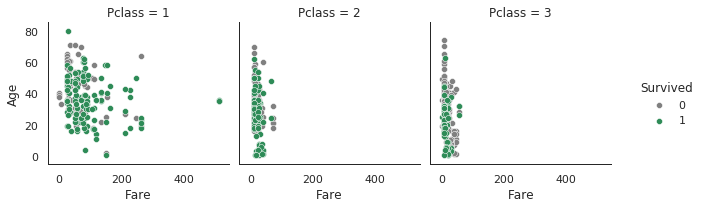

In [5]:
# Modify the graph above by assigning each species an individual color.
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"}) #https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

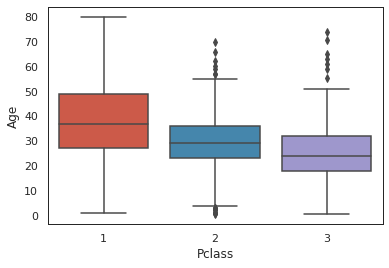

In [6]:
ax= sns.boxplot(x="Pclass", y="Age", data=df_train)
plt.show()

<Figure size 432x288 with 0 Axes>

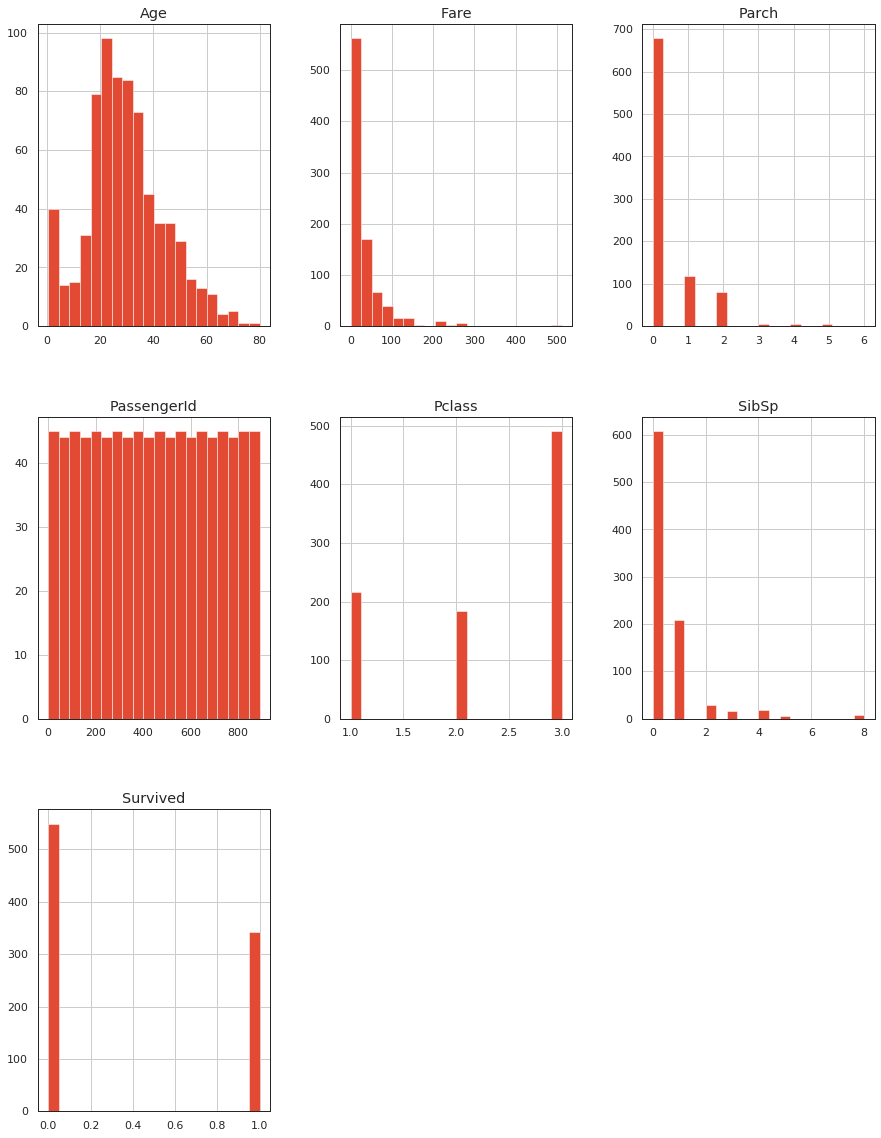

<Figure size 432x288 with 0 Axes>

In [7]:
# histograms
df_train.hist(figsize=(15,20),bins=20)
plt.figure()

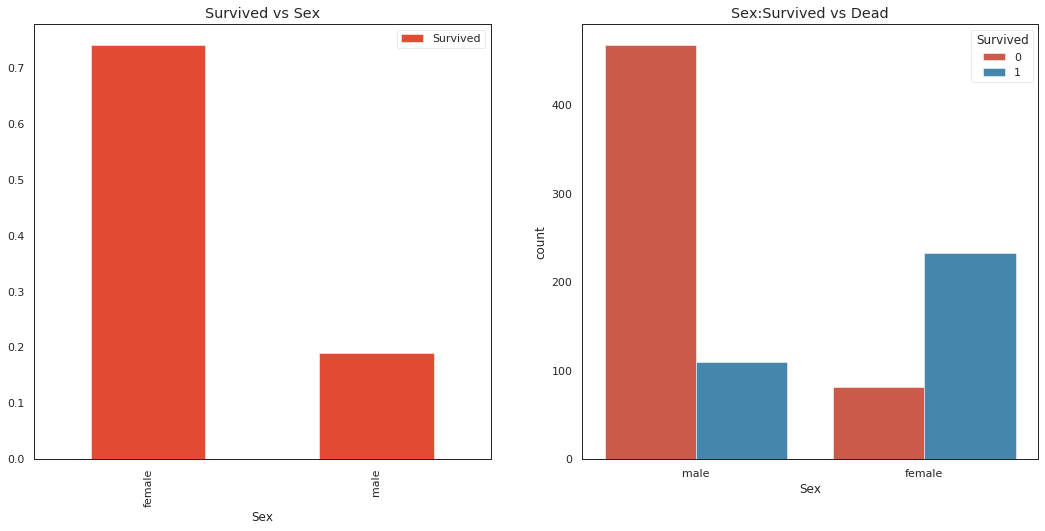

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

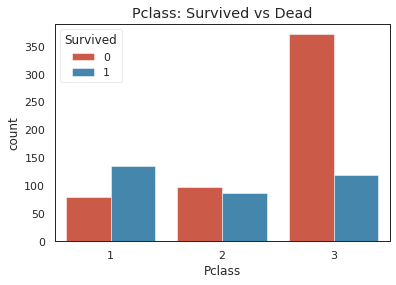

In [9]:
sns.countplot('Pclass', hue='Survived', data=df_train)
plt.title('Pclass: Survived vs Dead')
plt.show()

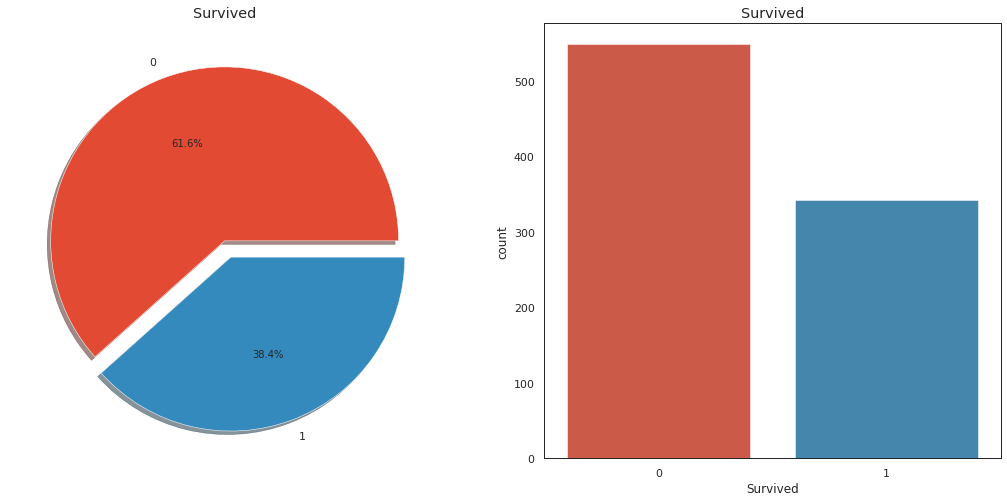

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Data Preprocessing
Data preprocessing là kĩ thuật chuẩn hóa, làm sạch dữ liệu trước khi đưa vào thuật toán. Một vài bước tiêu biểu của Data preprocessing:

Xử lý dữ liệu không cân bằng
Xử lý dữ liệu bị thiếu
Xử lý nhiễu
Chuẩn hóa dữ liệu
Chọn lọc đặc trưng

https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

In [11]:
# shape
print(df_train.shape)

(891, 12)


In [12]:
#columns*rows
df_train.size

10692

In [13]:
df_train.isnull() #see data is null in column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# remove rows that have NA's
# df_train = df_train.dropna()

In [15]:
# import train and test to play with it
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(df_train.shape)

(891, 12)


In [17]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [18]:
df_train['Age'].unique() # return all current values in column

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
df_train["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [20]:
df_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
df_train.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df_train.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
df_train.sample(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S


In [24]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
df_train.where(df_train['Age']==30).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_train[df_train['Age']==30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C


In [28]:
df_train = df_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]
df_train.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values 

In [30]:
X[0]

array([1, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171',
       7.25, nan, 'S'], dtype=object)

In [0]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

In [0]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

In [33]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
85,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
794,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
161,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
815,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S


In [0]:
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

# logreg_prediction = logreg.predict(X_test)
# logreg_score = accuracy_score(y_test, logreg_prediction)
# print(logreg_score)

Feature transformations
Chúng ta sẽ chuyển đổi dữ liệu sang một dạng mới với kì vọng sẽ đem lại giá trị tốt hơn cho việc phân tích, đưa ra quyết định Ở đây chúng ta sẽ biến đổi:

Age
Cabin
Fare
Name

In [34]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_train.head() 

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Lname,NamePrefix
0,1,3,male,Student,1,0,1_quartile,N,0,"Braund,",Mr.
1,2,1,female,Adult,1,0,4_quartile,C,1,"Cumings,",Mrs.
2,3,3,female,Young Adult,0,0,1_quartile,N,1,"Heikkinen,",Miss.
3,4,1,female,Young Adult,1,0,4_quartile,C,1,"Futrelle,",Mrs.
4,5,3,male,Young Adult,0,0,2_quartile,N,0,"Allen,",Mr.


Feature Encoding.

Một số cách mã hóa đặc trưng:

One hot encoding (thống kê).

TFIDF (thống kê).

Count Vectorwriter (example: I am student .... student [1 1 2], những chữ nào không xuất hiện sẽ đánh 0, đánh số theo số lần xuất hiện của từ trong câu).

In [0]:
def encode_features(df_train):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = df_train[features]
    
    for feature in features:
        le = preprocessing.LabelEncoder() #feature encoding
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [36]:
#Encode Dataset
df_train = encode_features(df_train)
df_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Lname,NamePrefix
0,1,3,1,4,1,0,0,7,0,73,17
1,2,1,0,0,1,0,3,2,1,136,18
2,3,3,0,7,0,0,0,7,1,251,14
3,4,1,0,7,1,0,3,2,1,198,18
4,5,3,1,7,0,0,1,7,0,11,17


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(df_train["Age"]).reshape(-1, 1)
fares_train = np.array(df_train["Fare"]).reshape(-1, 1)

df_train["Age"] = scaler.fit_transform(ages_train)
df_train["Fare"] = scaler.fit_transform(fares_train)

In [0]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

In [0]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
logreg_prediction = logreg.predict(X_test) #=> y_pred
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

0.7835820895522388


In [42]:
logreg_clf = LogisticRegression()

parameters_logreg = {"fit_intercept": [True, False],
                     "max_iter": [10, 50, 100, 200, 500, 1000], 
                     "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score)) #NOTE research GridSearch
grid_logreg.fit(X_train, y_train)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_train, y_train)

logreg_prediction = logreg_clf.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

0.7947761194029851


In [0]:
X_train.shape

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense, Activation, Dropout

# def f1...
def create_model(dropout_rate=0.0, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(256, input_shape=(9, )))
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128))
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64))
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(
        loss='binary_crossentropy',  # we train 10-way classification
        optimizer=optimizer, 
        metrics=['accuracy']  # report accuracy during training
    )
    return model

In [44]:
model = create_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2560      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dr

In [45]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(
    build_fn=create_model,
    epochs=100, batch_size=10, verbose=1)


# define the grid search parameters
# batch_size = [16, 32, 64, 128]
# epochs = [50, 100, 200]
# dropout_rate = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
# activation = ['relu', 'tanh', 'sigmoid']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [32, 64]
epochs = [10, 20]
# dropout_rate = [0.05, 0.1]
activation = ['relu', 'sigmoid']
# optimizer = ['SGD', 'Adam', 'Nadam']
param_grid = dict(batch_size=batch_size, 
                  epochs=epochs, 
                  # dropout_rate=dropout_rate,
                  activation=activation,
                  # optimizer=optimizer
                  )

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    verbose=1,
                    cv=5,
                    )

grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 498 samples
Epoch 1/10
498/498 [==============================] - 0s 664us/sample - loss: 2.2861 - acc: 0.5361
Epoch 2/10
498/498 [==============================] - 0s 100us/sample - loss: 1.0350 - acc: 0.5542
Epoch 3/10
498/498 [==============================] - 0s 81us/sample - loss: 1.3086 - acc: 0.5643
Epoch 4/10
498/498 [==============================] - 0s 73us/sample - loss: 1.2268 - acc: 0.5622
Epoch 5/10
498/498 [==============================] - 0s 76us/sample - loss: 0.8156 - acc: 0.6044
Epoch 6/10
498/498 [==============================] - 0s 80us/sample - loss: 0.6203 - acc: 0.6847
Epoch 7/10
498/498 [==============================] - 0s 80us/sample - loss: 0.6106 - acc: 0.6787
Epoch 8/10
498/498 [==============================] - 0s 81us/sample - loss: 0.6374 - acc: 0.6446
Epoch 9/10
498/498 [==============================] - 0s 82us/sample - loss: 0.6288 - acc: 0.6767
Epoch 10/10
125/125 [==============================] - 0s 273us/sample - loss: 0.9767 - acc: 0.

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.1min finished


Train on 623 samples
Epoch 1/20
623/623 [==============================] - 1s 926us/sample - loss: 0.6716 - acc: 0.6132
Epoch 2/20
623/623 [==============================] - 0s 162us/sample - loss: 0.6679 - acc: 0.6260
Epoch 3/20
623/623 [==============================] - 0s 159us/sample - loss: 0.6627 - acc: 0.6260
Epoch 4/20
623/623 [==============================] - 0s 162us/sample - loss: 0.6620 - acc: 0.6260
Epoch 5/20
623/623 [==============================] - 0s 173us/sample - loss: 0.6565 - acc: 0.6260
Epoch 6/20
623/623 [==============================] - 0s 152us/sample - loss: 0.6563 - acc: 0.6260
Epoch 7/20
623/623 [==============================] - 0s 157us/sample - loss: 0.6605 - acc: 0.6260
Epoch 8/20
623/623 [==============================] - 0s 172us/sample - loss: 0.6480 - acc: 0.6372
Epoch 9/20
623/623 [==============================] - 0s 169us/sample - loss: 0.6438 - acc: 0.6469
Epoch 10/20
623/623 [==============================] - 0s 165us/sample - loss: 0.6402 - 

In [46]:
grid_best = grid.best_estimator_

history = grid_best.fit(X_train, y_train)

logreg_prediction = grid_best.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

Train on 623 samples
Epoch 1/20
623/623 [==============================] - 1s 950us/sample - loss: 0.6663 - acc: 0.6260
Epoch 2/20
623/623 [==============================] - 0s 145us/sample - loss: 0.6736 - acc: 0.5827
Epoch 3/20
623/623 [==============================] - 0s 167us/sample - loss: 0.6719 - acc: 0.6308
Epoch 4/20
623/623 [==============================] - 0s 136us/sample - loss: 0.6605 - acc: 0.6260
Epoch 5/20
623/623 [==============================] - 0s 155us/sample - loss: 0.6553 - acc: 0.6260
Epoch 6/20
623/623 [==============================] - 0s 157us/sample - loss: 0.6521 - acc: 0.6260
Epoch 7/20
623/623 [==============================] - 0s 147us/sample - loss: 0.6507 - acc: 0.6340
Epoch 8/20
623/623 [==============================] - 0s 146us/sample - loss: 0.6466 - acc: 0.6485
Epoch 9/20
623/623 [==============================] - 0s 135us/sample - loss: 0.6318 - acc: 0.6533
Epoch 10/20
623/623 [==============================] - 0s 141us/sample - loss: 0.6235 - 

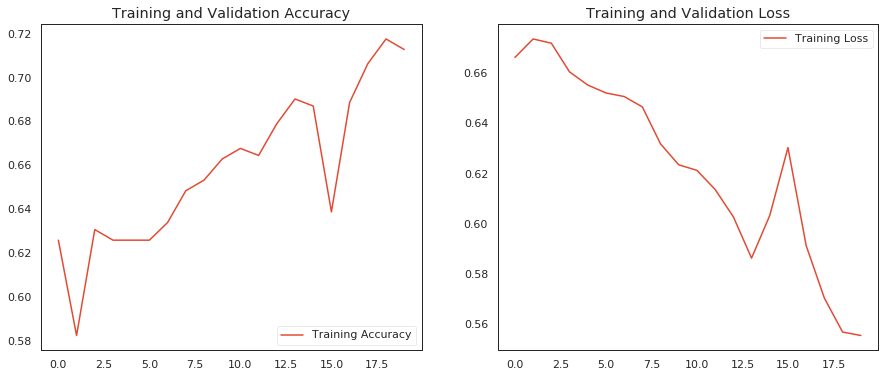

In [47]:
acc = history.history['acc']
# val_acc = history.history['val_acc']

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()